This notebook contains evaluation result graphs for the anwer extraction task.

#### Imports

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

#### Util functions

In [ ]:
def annotate_best(x,y, label, ax):
    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]

    ax.annotate(label + ': %.1f' % ymax, xy=(xmax, ymax), xytext=(xmax, ymax + 1),
            arrowprops=dict(facecolor='black', width = 2, headwidth = 8, headlength = 8),
            )

def line_best(x,y, label, color = 'black', offsetx = 2000, offsety = 25):
    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    plt.axvline(xmax, color = color)
    plt.text((xmax + offsetx) , offsety, label + '   %.1f' % ymax ,rotation=90)
    

In [ ]:
def plot_train_against_val(result, title, withborder = False, xborder = 0):
    
    nextplot()
    
    x = result['steps']
    y=result['exact_match']
    fig, ax1 = plt.subplots()
    #fig.set_size_inches(18.5, 12.5)
    color = 'tab:blue'
    ax1.set_xlabel('steps')
    ax1.set_ylabel('train loss', color=color)
    ax1.plot(x, result['train_loss'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:orange'
    ax2.set_ylabel('exact match on val', color=color)  # we already handled the x-label with ax1
    ax2.plot(x, y , color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    annotate_best(x,y, 'best EM', ax2)
    
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    if withborder:
        plt.axvline(xborder, color = 'black', linestyle='dotted')
    
    #fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.suptitle(title)
    plt.show()

In [ ]:
def nextplot():
    inNotebook = "IPKernelApp" in get_ipython().config
    if inNotebook:
        plt.figure()  # this creates a new plot
    else:
        plt.clf()  # and this clears the current one

#### Result Dictionaries

In [ ]:
# Roberta results dict
result = {}
result['1to1'] = {
    'steps': [1000 , 2000 , 3000 , 4000 , 5000 , 6000 , 7000 , 8000 , 9000 , 10000 , 11000 , 12000 , 13000 , 14000 , 15000 , 16000 , 17000 , 18000 , 19000 , 20000 , 21000 , 22000 , 23000 , 24000 , 25000 , 26000 , 27000 , 28000 , 29000 , 30000 , 31000 , 32000 , 33000 , 34000 , 35000 , 36000 , 37000 , 38000 , 39000 , 40000 , 41000 , 42000 , 43000 , 44000 , 45000 , 46000 , 47000 , 48000 , 49000 , 50000 , 51000 , 52000 , 53000 , 54000 , 55000 , 56000 , 57000 , 58000 , 59000 , 60000 , 61000 , 62000 , 63000 , 64000 , 65000 , 66000 , 67000 , 68000 , 69000 , 70000 , 71000 , 72000 , 73000 , 74000 , 75000 , 76000 , 77000 , 78000 , 79000 , 80000 , 81000 , 82000 , 83000 , 84000 , 85000 , 86000 , 87000 , 88000 , 89000 , 90000 , 91000 , 92000 , 93000 , 94000 , 95000 , 96000 , 97000 , 98000 , 99000 , 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000],
    'train_loss': [1.590100, 1.626300, 1.468600, 1.450500, 1.393000, 1.278100, 1.190800, 1.413900, 1.222500, 1.238500, 1.390700, 1.171300, 1.258200, 1.171700, 1.281300, 1.132800, 1.205000, 1.171600, 1.313600, 1.239500, 1.157100, 1.028600, 1.068300, 1.152900, 1.149700, 1.129200, 1.089100, 0.779500, 1.042500, 1.007900, 0.886500, 0.814800, 0.950000, 0.796600, 1.003300, 0.855500, 0.875700, 0.966600, 0.975100, 0.759100, 0.936200, 0.863800, 0.910000, 0.876600, 1.023300, 0.824800, 0.916200, 0.856500, 0.902000, 0.921100, 0.859200, 0.940300, 0.732400, 0.864200, 0.851600, 0.708300, 0.678400, 0.680200, 0.613400, 0.685600, 0.708400, 0.700300, 0.640300, 0.710200, 0.747900, 0.627700, 0.715000, 0.619400, 0.617000, 0.627400, 0.614900, 0.673600, 0.754800, 0.592600, 0.615000, 0.690500, 0.604800, 0.591700, 0.542300, 0.510700, 0.637500, 0.641900, 0.611400, 0.379900, 0.432700, 0.415300, 0.344800, 0.448200, 0.415200, 0.388300, 0.414300, 0.488100, 0.478900, 0.501100, 0.522900, 0.438500, 0.482200, 0.438700, 0.499500, 0.357900, 0.495700, 0.299900, 0.391900, 0.456700, 0.449000, 0.370900, 0.489600, 0.430600, 0.366000, 0.424700, 0.376600, 0.239300, 0.342500, 0.304800, 0.258900, 0.273500, 0.267300, 0.264800, 0.390500],
    'exact_match' : [37.459807, 40.192926, 43.890675, 45.176849, 44.694534, 47.106109, 50.643087, 47.749196, 49.678457, 49.035370, 48.874598, 49.678457, 48.392283, 49.035370, 49.839228, 53.054662, 52.090032, 50.803859, 51.286174, 52.411576, 51.446945, 54.662379, 54.983923, 52.250804, 52.893891, 50.482315, 50.160772, 55.144695, 53.376206, 53.536977, 52.733119, 53.215434, 52.572347, 52.411576, 54.019293, 51.929260, 53.376206, 52.411576, 54.340836, 54.019293, 54.340836, 54.662379, 54.019293, 55.627010, 52.411576, 55.305466, 57.234727, 54.019293, 54.501608, 52.572347, 56.109325, 53.858521, 54.019293, 55.466238, 57.234727, 55.144695, 54.501608, 53.858521, 54.340836, 54.019293, 54.983923, 55.144695, 53.054662, 55.305466, 54.180064, 53.054662, 56.913183, 54.662379, 55.627010, 54.340836, 53.536977, 52.733119, 52.893891, 54.983923, 53.858521, 55.305466, 55.627010, 53.215434, 55.305466, 55.466238, 54.180064, 55.305466, 54.662379, 54.340836, 54.019293, 53.376206, 54.662379, 52.250804, 52.572347, 52.090032, 53.697749, 54.180064, 51.607717, 52.893891, 53.697749, 53.376206, 53.536977, 52.893891, 51.607717, 55.466238, 53.376206, 54.501608, 53.536977, 55.787781, 54.983923, 54.983923, 56.430868, 55.144695, 54.983923, 55.305466, 53.858521, 53.054662, 53.376206, 52.572347, 51.125402, 53.858521, 52.411576, 52.572347, 53.054662],
    'F1' : [42.807332, 44.575578, 50.023122, 49.496138, 49.924240, 51.356867, 54.104272, 52.342665, 53.676696, 52.958422, 52.311176, 53.724180, 52.078110, 52.494102, 53.854650, 55.886220, 55.878317, 54.639922, 54.846780, 56.088463, 54.725029, 57.810983, 58.748392, 56.152950, 56.268461, 54.394554, 54.509008, 58.586854, 57.076252, 57.091946, 56.427504, 56.882547, 57.049146, 57.074191, 58.573470, 56.148527, 56.965417, 56.508087, 58.381565, 57.553335, 58.222560, 59.194345, 57.591754, 59.399335, 55.737240, 58.720229, 61.003572, 58.220410, 58.660498, 56.565319, 59.513857, 57.079673, 57.645682, 58.558971, 60.586905, 57.917071, 58.337544, 57.758979, 58.263028, 58.051600, 59.932629, 59.542821, 57.125027, 58.913260, 57.964707, 57.608870, 60.538105, 58.522049, 60.183356, 58.600521, 58.643532, 57.341142, 56.369623, 58.463865, 58.300796, 59.471075, 60.447481, 58.356500, 59.800001, 59.541163, 57.890828, 59.892053, 58.886780, 58.516690, 58.162481, 57.844511, 58.414868, 56.268948, 56.356990, 56.076022, 58.559736, 58.272261, 55.853238, 57.147095, 58.145940, 56.805053, 58.227301, 56.892895, 56.198654, 59.631373, 57.127720, 57.774460, 57.246593, 58.500612, 58.505972, 58.227788, 59.594626, 58.741004, 58.365105, 58.685500, 56.841984, 56.648571, 57.513015, 56.389144, 54.759016, 56.837008, 55.600388, 55.729980, 56.382811]
}
result['1to2'] = {
    'steps' :  [1000 , 2000 , 3000 , 4000 , 5000 , 6000 , 7000 , 8000 , 9000 , 10000 , 11000 , 12000 , 13000 , 14000 , 15000 , 16000 , 17000 , 18000 , 19000 , 20000 , 21000 , 22000 , 23000 , 24000 , 25000 , 26000 , 27000 , 28000 , 29000 , 30000 , 31000 , 32000 , 33000 , 34000 , 35000 , 36000 , 37000 , 38000 , 39000 , 40000 , 41000 , 42000 , 43000 , 44000 , 45000 , 46000 , 47000 , 48000 , 49000 , 50000 , 51000 , 52000 , 53000 , 54000 , 55000 , 56000 , 57000 , 58000 , 59000 , 60000 , 61000 , 62000 , 63000 , 64000 , 65000 , 66000 , 67000 , 68000 , 69000 , 70000 , 71000 , 72000 , 73000 , 74000 , 75000 , 76000 , 77000 , 78000 , 79000 , 80000 , 81000 , 82000 , 83000 , 84000 , 85000 , 86000 , 87000 , 88000 , 89000 , 90000 , 91000 , 92000 , 93000 , 94000 , 95000 , 96000 , 97000 , 98000 , 99000 , 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000, 133000, 134000, 135000, 136000, 137000],
    'train_loss' : [1.477800, 1.344900, 1.287000, 1.045400, 1.171500, 1.100700, 1.162200, 1.072100, 1.014800, 1.114600, 0.953200, 1.061700, 0.934500, 0.912500, 1.139000, 0.952000, 1.107600, 1.042000, 1.072200, 1.000700, 0.913400, 0.944900, 1.008800, 1.027400, 0.975900, 0.920800, 0.995000, 1.014800, 0.812900, 0.903000, 0.955500, 1.006500, 0.826600, 0.907000, 0.885300, 0.937000, 0.796800, 0.921900, 0.911800, 0.948300, 0.987000, 0.762600, 0.768400, 0.709800, 0.723800, 0.756000, 0.725200, 0.831700, 0.771900, 0.791800, 0.776500, 0.826400, 0.879400, 0.694300, 0.730000, 0.735300, 0.706100, 0.670300, 0.787600, 0.661700, 0.655700, 0.680500, 0.802400, 0.618100, 0.902600, 0.650700, 0.749500, 0.798400, 0.695200, 0.855300, 0.788800, 0.693600, 0.735600, 0.786600, 0.594600, 0.830500, 0.700200, 0.656400, 0.648600, 0.737300, 0.681700, 0.684500, 0.624600, 0.560800, 0.620800, 0.579800, 0.480300, 0.626800, 0.467000, 0.632700, 0.590300, 0.649100, 0.632800, 0.532300, 0.543000, 0.610100, 0.521100, 0.487100, 0.467200, 0.558800, 0.556800, 0.569900, 0.619400, 0.561100, 0.517000, 0.526200, 0.625400, 0.684000, 0.609600, 0.519900, 0.379600, 0.445400, 0.647700, 0.533800, 0.511300, 0.513400, 0.596600, 0.645800, 0.538700, 0.513800, 0.366800, 0.492800, 0.649800, 0.459000, 0.595500, 0.345400, 0.380200, 0.416400, 0.429200, 0.397900, 0.415600, 0.399900, 0.491900, 0.342200, 0.387900, 0.440200, 0.312800],
    'exact_match' : [27.974277, 38.424437, 44.372990, 39.228296, 42.765273, 41.961415, 44.212219, 47.266881, 47.266881, 45.498392, 45.337621, 44.212219, 46.623794, 43.729904, 44.533762, 46.623794, 47.427653, 45.819936, 48.553055, 46.623794, 47.749196, 44.533762, 48.392283, 46.623794, 46.302251, 45.498392, 43.729904, 47.909968, 38.102894, 49.517685, 45.819936, 48.392283, 47.588424, 49.035370, 48.553055, 46.463023, 49.678457, 51.125402, 48.713826, 48.713826, 48.392283, 48.070740, 46.784566, 48.392283, 45.659164, 49.035370, 47.266881, 47.266881, 47.588424, 46.302251, 48.713826, 46.623794, 50.000000, 49.035370, 47.588424, 50.964630, 48.713826, 49.517685, 49.678457, 50.000000, 47.749196, 50.482315, 49.678457, 51.446945, 51.446945, 50.803859, 51.286174, 52.733119, 51.286174, 50.000000, 50.964630, 50.803859, 51.125402, 53.054662, 51.768489, 48.553055, 52.411576, 50.643087, 51.607717, 51.446945, 51.929260, 52.733119, 51.929260, 50.482315, 50.482315, 50.964630, 50.964630, 50.803859, 51.607717, 50.160772, 50.964630, 49.035370, 51.607717, 51.768489, 52.733119, 52.250804, 53.215434, 51.929260, 50.000000, 50.482315, 51.125402, 53.376206, 53.054662, 53.536977, 54.180064, 53.536977, 50.643087, 50.160772, 53.054662, 51.607717, 53.215434, 50.964630, 50.964630, 50.321543, 52.733119, 49.678457, 52.893891, 50.964630, 54.019293, 53.536977, 53.376206, 50.803859, 51.446945, 52.893891, 52.411576, 50.964630, 51.286174, 52.411576, 51.768489, 51.929260, 50.160772, 52.090032, 50.964630, 52.250804, 51.125402, 50.000000, 51.607717],
    'F1' : [33.208940, 42.920533, 49.531761, 43.239380, 47.030675, 46.737500, 47.815693, 51.695959, 51.006582, 49.444448, 49.778708, 49.346448, 51.448117, 48.078395, 49.677567, 50.689022, 51.559944, 50.735604, 54.037291, 50.725425, 51.129309, 48.305738, 53.124913, 50.968938, 50.690094, 49.806691, 47.908670, 52.784305, 41.625425, 53.334034, 50.343501, 52.419614, 51.810108, 54.016005, 52.536261, 50.699485, 53.713490, 54.252220, 51.340913, 52.344362, 52.154428, 52.140943, 51.433930, 52.139412, 49.856336, 53.216200, 50.863765, 51.186994, 51.523677, 51.108011, 52.783647, 50.186530, 54.097382, 53.170411, 51.937077, 54.298423, 52.322003, 53.620043, 53.736585, 54.240532, 51.657412, 54.186941, 53.842346, 55.710585, 55.784127, 54.959807, 55.686291, 57.784158, 54.829462, 54.492189, 55.593962, 54.843694, 56.016767, 56.432782, 55.954678, 52.770250, 56.020326, 55.471450, 56.199663, 55.248813, 55.921758, 56.263461, 55.780891, 54.531083, 54.042893, 54.364186, 54.658470, 54.371076, 55.454383, 54.337862, 54.912341, 53.077630, 55.629689, 56.334366, 56.802557, 56.363497, 57.070510, 55.539351, 54.603916, 54.543715, 54.577688, 56.987040, 56.915097, 56.962878, 57.309753, 57.337247, 55.356606, 54.819706, 56.541494, 55.484763, 56.937090, 55.736019, 55.482241, 53.747975, 56.908973, 53.828814, 56.461491, 55.350253, 57.257311, 57.423442, 57.817333, 55.442593, 55.421992, 56.464936, 56.033690, 54.446358, 54.856837, 56.385133, 55.636579, 55.389838, 53.468458, 55.513831, 54.593860, 55.897702, 54.366100, 54.105548, 55.186801]
}
result['1to4'] = {
    'steps' :  [1000 , 2000 , 3000 , 4000 , 5000 , 6000 , 7000 , 8000 , 9000 , 10000 , 11000 , 12000 , 13000 , 14000 , 15000 , 16000 , 17000 , 18000 , 19000 , 20000 , 21000 , 22000 , 23000 , 24000 , 25000 , 26000 , 27000 , 28000 , 29000 , 30000 , 31000 , 32000 , 33000 , 34000 , 35000 , 36000 , 37000 , 38000 , 39000 , 40000 , 41000 , 42000 , 43000 , 44000 , 45000 , 46000 , 47000 , 48000 , 49000 , 50000 , 51000 , 52000 , 53000 , 54000 , 55000 , 56000 , 57000 , 58000 , 59000 , 60000 , 61000 , 62000 , 63000 , 64000 , 65000 , 66000 , 67000 , 68000 , 69000 , 70000 , 71000 , 72000 , 73000 , 74000 , 75000 , 76000 , 77000 , 78000 , 79000 , 80000 , 81000 , 82000 , 83000 , 84000 , 85000 , 86000 , 87000 , 88000 , 89000 , 90000 , 91000 , 92000 , 93000 , 94000 , 95000 , 96000 , 97000 , 98000 , 99000 , 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000, 133000, 134000, 135000, 136000, 137000, 138000],
    'train_loss' : [1.246900, 0.979000, 0.704900, 1.077800, 0.848100, 0.908000, 0.668900, 0.840100, 0.869100, 0.892800, 0.854600, 0.763400, 1.379900, 0.793700, 0.708500, 0.782900, 0.942000, 0.796900, 0.745500, 0.773700, 0.823600, 0.813600, 0.837700, 0.924600, 0.786900, 0.919600, 0.747600, 0.721100, 0.786800, 0.737900, 0.819400, 0.687900, 0.976600, 0.721900, 0.933600, 0.736900, 1.052600, 0.832100, 0.764400, 0.695700, 0.762100, 0.771000, 0.747900, 0.907300, 0.670800, 0.788900, 0.825800, 0.795500, 0.674200, 0.729000, 0.594000, 0.573000, 0.622700, 0.581200, 0.717700, 0.678000, 0.713000, 0.616000, 0.657200, 0.610400, 0.594200, 0.768000, 0.707200, 0.695100, 0.556900, 0.659200, 0.710400, 0.666100, 0.681600, 0.595700, 0.690300, 0.746900, 0.554600, 0.705900, 0.541700, 0.537100, 0.644200, 0.750500, 0.631200, 0.556700, 0.587400, 0.633400, 0.543700, 0.619000, 0.568700, 0.607700, 0.714800, 0.681100, 0.591100, 0.680300, 0.487100, 0.627400, 0.649900, 0.645100, 0.684900, 0.490800, 0.683400, 0.769900, 0.544100, 0.559600, 0.614600, 0.632800, 0.629700, 0.630700, 0.785100, 0.527600, 0.533000, 0.661500, 0.436500, 0.541600, 0.501900, 0.489300, 0.527200, 0.625600, 0.651800, 0.628400, 0.678400, 0.534800, 0.506800, 0.630900, 0.599400, 0.657800, 0.483400, 0.527200, 0.619000, 0.605500, 0.615000, 0.676900, 0.492800, 0.600700, 0.514900, 0.549100, 0.620000, 0.637400, 0.503700, 0.515000, 0.532700, 0.508500],
    'exact_match' : [18.810289, 19.935691, 29.421222, 36.012862, 34.083601, 28.778135, 30.064309, 36.655949, 35.530547, 39.228296, 40.996785, 41.157556, 37.299035, 33.922830, 36.977492, 31.993569, 40.192926, 39.067524, 36.977492, 36.977492, 36.977492, 42.282958, 41.479100, 44.212219, 42.122186, 41.318328, 41.157556, 42.443730, 43.729904, 39.389068, 45.659164, 37.620579, 38.745981, 43.890675, 37.138264, 39.389068, 33.762058, 40.514469, 42.765273, 41.479100, 42.122186, 37.781350, 42.443730, 41.639871, 40.514469, 41.800643, 43.247588, 41.157556, 40.353698, 43.086817, 44.372990, 41.800643, 45.016077, 44.212219, 46.141479, 45.498392, 42.765273, 44.694534, 43.569132, 43.408360, 45.819936, 43.408360, 43.569132, 45.819936, 44.855305, 45.980707, 42.765273, 43.086817, 44.372990, 42.122186, 40.514469, 45.016077, 44.533762, 43.569132, 44.372990, 41.639871, 45.016077, 46.463023, 44.051447, 42.282958, 44.372990, 44.533762, 41.961415, 44.372990, 43.569132, 43.729904, 40.996785, 45.016077, 41.318328, 43.569132, 42.765273, 43.408360, 43.247588, 42.604502, 43.569132, 42.604502, 42.765273, 41.479100, 45.819936, 43.247588, 42.765273, 44.212219, 44.855305, 42.765273, 43.569132, 43.729904, 44.212219, 45.016077, 46.623794, 42.443730, 44.372990, 44.051447, 44.051447, 40.032154, 44.533762, 43.729904, 45.980707, 47.588424, 44.533762, 45.980707, 46.302251, 45.659164, 43.086817, 41.639871, 43.729904, 45.337621, 44.372990, 44.694534, 43.408360, 44.533762, 44.855305, 48.070740, 45.980707, 48.553055, 43.569132, 45.016077, 47.749196, 45.016077],
    'F1' : [22.610960, 23.851176, 33.907644, 41.163409, 37.823106, 31.482162, 32.832355, 41.141159, 39.513049, 44.153930, 45.599684, 46.309536, 42.287228, 38.985203, 41.159768, 36.591797, 44.576124, 43.462569, 40.122348, 41.174343, 41.343058, 46.344688, 46.105700, 48.746764, 47.484694, 44.693449, 45.661768, 46.334099, 48.147716, 43.475221, 49.617814, 42.337106, 43.040650, 47.760833, 41.851960, 43.326831, 36.257847, 44.402328, 45.942509, 45.920345, 46.126369, 41.917842, 46.186822, 45.770749, 44.610061, 46.148921, 47.192325, 44.899071, 43.275658, 46.925572, 49.167583, 46.212093, 49.923044, 49.133040, 50.507583, 49.905830, 47.225845, 48.620291, 47.610881, 47.539484, 49.679642, 48.220026, 47.628904, 49.738322, 48.905629, 50.596144, 46.637124, 47.638012, 48.485325, 46.028421, 44.139405, 49.683896, 48.564430, 47.638333, 48.202042, 45.800557, 49.726304, 50.604998, 47.450493, 45.952275, 48.670154, 48.443126, 45.422198, 47.825479, 47.251167, 47.985273, 46.013152, 49.430281, 45.428960, 47.725581, 45.786601, 47.431514, 47.150385, 47.042351, 47.065733, 47.463376, 46.732887, 45.885393, 50.102843, 47.876282, 48.003094, 48.296968, 49.155341, 46.666005, 47.009093, 47.900866, 48.094345, 48.747916, 50.654651, 46.311498, 48.148254, 47.424399, 47.583831, 43.167674, 47.450701, 47.488228, 49.609491, 50.829186, 49.067803, 49.851458, 50.311507, 49.724774, 46.498091, 45.345149, 49.034537, 49.917445, 48.008472, 48.866195, 46.860473, 47.444582, 49.022304, 51.913247, 49.868788, 52.397840, 47.595552, 47.973459, 51.431889, 48.452837]
}
result['1to1+1to4'] = {
    'steps' : [1000 , 2000 , 3000 , 4000 , 5000 , 6000 , 7000 , 8000 , 9000 , 10000 , 11000 , 12000 , 13000 , 14000 , 15000 , 16000 , 17000 , 18000 , 19000 , 20000 , 21000 , 22000 , 23000 , 24000 , 25000 , 26000 , 27000 , 28000 , 29000 , 30000 , 31000 , 32000 , 33000 , 34000 , 35000 , 36000 , 37000 , 38000 , 39000 , 40000 , 41000 , 42000 , 43000 , 44000 , 45000 , 46000 , 47000 , 48000 , 49000 , 50000 , 51000 , 52000 , 53000 , 54000 , 55000 , 56000 , 57000 , 58000 , 59000 , 60000 , 61000 , 62000 , 63000 , 64000 , 65000 , 66000 , 67000 , 68000 , 69000 , 70000 , 71000 , 72000 , 73000 , 74000 , 75000 , 76000 , 77000 , 78000 , 79000 , 80000 , 81000 , 82000 , 83000 , 84000 , 85000 , 86000 , 87000 , 88000 , 89000 , 90000 , 91000 , 92000 , 93000 , 94000 , 95000 , 96000 , 97000 , 98000 , 99000 , 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000],
    'train_loss' : [1.590100, 1.626300, 1.468600, 1.450500, 1.393000, 1.278100, 1.190800, 1.413900, 1.222500, 1.238500, 1.390700, 1.171300, 1.258200, 1.171700, 1.281300, 1.132800, 1.205000, 1.171600, 1.313600, 1.239500, 1.157100, 1.028600, 1.068300, 1.152900, 1.149700, 1.129200, 1.089100, 0.779500, 1.042500, 1.007900, 0.886500, 0.814800, 0.950000, 0.796600, 1.003300, 0.855500, 0.875700, 0.966600, 0.975100, 0.759100, 0.936200, 0.863800, 0.910000, 0.876600, 1.023300, 0.824800, 0.916200, 0.856500, 0.902000, 0.921100, 0.859200, 0.940300, 0.732400, 0.864200, 0.851600, 0.708300, 0.678400, 0.680200, 0.613400, 0.685600, 0.708400, 0.700300, 0.448500, 0.504300, 0.569500, 0.456600, 0.403800, 0.441400, 0.419700, 0.464900, 0.473600, 0.473900, 0.501200, 0.567500, 0.425600, 0.489500, 0.658500, 0.431000, 0.491400, 0.568200, 0.508600, 0.562000, 0.500800, 0.556900, 0.577000, 0.555300, 0.491400, 0.646300, 0.518900, 0.582900, 0.519200, 0.552700, 0.439800, 0.464300, 0.446600, 0.579200, 0.536800, 0.401900, 0.626000, 0.529700, 0.509500, 0.575200, 0.503100, 0.792300, 0.565100, 0.540000, 0.505600, 0.620500, 0.461300, 0.557900, 0.605600, 0.404100, 0.600200, 0.555700, 0.484500, 0.634500, 0.506500, 0.653100, 0.498200, 0.591000, 0.443400, 0.559800, 0.543300, 0.526500, 0.537600],
    'exact_match' : [37.459807, 40.192926, 43.890675, 45.176849, 44.694534, 47.106109, 50.643087, 47.749196, 49.678457, 49.035370, 48.874598, 49.678457, 48.392283, 49.035370, 49.839228, 53.054662, 52.090032, 50.803859, 51.286174, 52.411576, 51.446945, 54.662379, 54.983923, 52.250804, 52.893891, 50.482315, 50.160772, 55.144695, 53.376206, 53.536977, 52.733119, 53.215434, 52.572347, 52.411576, 54.019293, 51.929260, 53.376206, 52.411576, 54.340836, 54.019293, 54.340836, 54.662379, 54.019293, 55.627010, 52.411576, 55.305466, 57.234727, 54.019293, 54.501608, 52.572347, 56.109325, 53.858521, 54.019293, 55.466238, 57.234727, 55.144695, 54.501608, 53.858521, 54.340836, 54.019293, 54.983923, 55.144695, 49.839228, 47.749196, 48.070740, 46.784566, 44.212219, 50.000000, 46.302251, 50.643087, 50.000000, 47.427653, 48.553055, 49.035370, 47.749196, 49.035370, 48.713826, 47.588424, 48.713826, 47.909968, 45.819936, 52.090032, 50.160772, 48.070740, 48.392283, 46.784566, 49.196141, 47.588424, 45.176849, 48.231511, 48.392283, 46.302251, 48.874598, 51.286174, 46.302251, 48.231511, 48.392283, 46.463023, 45.819936, 48.553055, 48.392283, 48.070740, 45.016077, 47.749196, 47.266881, 45.980707, 48.070740, 48.713826, 48.392283, 50.160772, 50.000000, 45.819936, 44.533762, 44.694534, 47.588424, 50.321543, 47.909968, 49.517685, 50.321543, 47.266881, 47.427653, 50.482315, 49.356913, 50.482315, 46.945338],
    'F1' : [42.807332, 44.575578, 50.023122, 49.496138, 49.924240, 51.356867, 54.104272, 52.342665, 53.676696, 52.958422, 52.311176, 53.724180, 52.078110, 52.494102, 53.854650, 55.886220, 55.878317, 54.639922, 54.846780, 56.088463, 54.725029, 57.810983, 58.748392, 56.152950, 56.268461, 54.394554, 54.509008, 58.586854, 57.076252, 57.091946, 56.427504, 56.882547, 57.049146, 57.074191, 58.573470, 56.148527, 56.965417, 56.508087, 58.381565, 57.553335, 58.222560, 59.194345, 57.591754, 59.399335, 55.737240, 58.720229, 61.003572, 58.220410, 58.660498, 56.565319, 59.513857, 57.079673, 57.645682, 58.558971, 60.586905, 57.917071, 58.337544, 57.758979, 58.263028, 58.051600, 59.932629, 59.542821, 54.381998, 51.586489, 52.520373, 51.621306, 48.222069, 54.988835, 50.596386, 54.967080, 53.951233, 52.283930, 52.899457, 53.793064, 52.374380, 53.223672, 52.813477, 52.309318, 53.696984, 52.452917, 49.611851, 56.201793, 53.832273, 51.488925, 52.600119, 50.982621, 53.044710, 52.111785, 49.217386, 52.408724, 51.988210, 51.003708, 52.903054, 55.099676, 50.723855, 51.932068, 52.186640, 50.348658, 50.996210, 52.406973, 52.005678, 52.596651, 49.651557, 52.378230, 50.834482, 50.060511, 53.149550, 53.374292, 52.864372, 53.913770, 53.108721, 49.692620, 48.401853, 48.377716, 51.204895, 54.424761, 52.403920, 53.595024, 53.723171, 51.197111, 50.620738, 53.806079, 53.393157, 54.406102, 51.401555]
}

In [ ]:
# Compare balanced Distilbert, Bert, Distilroberta results dict

compare_1to1_results = {}

compare_1to1_results['distilbert'] = {
    'steps': [1000 , 2000 , 3000 , 4000 , 5000 , 6000 , 7000 , 8000 , 9000 , 10000 , 11000 , 12000 , 13000 , 14000 , 15000 , 16000 , 17000 , 18000 , 19000 , 20000 , 21000 , 22000 , 23000 , 24000 , 25000 , 26000 , 27000 , 28000 , 29000 , 30000 , 31000 , 32000 , 33000 , 34000 , 35000 , 36000 , 37000 , 38000 , 39000 , 40000 , 41000 , 42000 , 43000 , 44000 , 45000 , 46000 , 47000 , 48000 , 49000 , 50000 , 51000 , 52000 , 53000 , 54000 , 55000 , 56000 , 57000 , 58000 , 59000 , 60000 , 61000 , 62000 , 63000 , 64000 , 65000 , 66000 , 67000 , 68000 , 69000 , 70000 , 71000 , 72000 , 73000 , 74000 , 75000 , 76000 , 77000 , 78000 , 79000 , 80000 , 81000 , 82000 , 83000 , 84000 , 85000 , 86000 , 87000 , 88000 , 89000 , 90000 , 91000 , 92000 , 93000 , 94000 , 95000 , 96000 , 97000 , 98000 , 99000 , 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000],
    'train_loss': [2.039800, 1.668200, 1.732300, 1.515600, 1.405800, 1.445700, 1.211500, 1.327900, 1.404700, 1.276400, 1.279100, 1.292200, 1.265100, 0.984900, 0.940000, 0.887300, 0.950900, 0.951800, 0.950900, 0.905500, 0.821200, 0.872300, 0.889300, 0.886100, 0.829700, 0.840700, 0.871000, 0.650500, 0.576800, 0.507300, 0.590100, 0.632800, 0.590900, 0.540300, 0.594200, 0.640100, 0.656100, 0.549800, 0.605900, 0.712700, 0.588900, 0.324800, 0.328800, 0.361000, 0.407200, 0.382600, 0.373300, 0.431700, 0.334700, 0.308600, 0.355800, 0.330100, 0.307300, 0.344200, 0.297900, 0.231000, 0.271900, 0.296700, 0.264700, 0.322300, 0.294600, 0.265900, 0.331800, 0.258600, 0.291400, 0.231300, 0.265400, 0.209300, 0.203600, 0.163200, 0.207500, 0.211600, 0.208000, 0.156700, 0.225900, 0.233400, 0.260700, 0.242400, 0.204800, 0.232900, 0.228900, 0.242100, 0.288900, 0.181600, 0.117700, 0.137900, 0.130500, 0.113000, 0.138800, 0.184300, 0.127400, 0.165900, 0.172400, 0.166300, 0.110900, 0.195900, 0.194300, 0.119900, 0.109000, 0.095200, 0.106700, 0.136400, 0.071700, 0.124200, 0.129100, 0.141100, 0.110100, 0.115400, 0.116700, 0.058400, 0.109500, 0.087300, 0.055800, 0.054300, 0.083900, 0.083300, 0.076300, 0.105400, 0.070500, 0.084400],
    'exact_match' : [14.147910, 25.723473, 34.887460, 34.083601, 38.745981, 39.549839, 45.498392, 40.996785, 43.569132, 41.800643, 43.569132, 46.302251, 46.945338, 47.427653, 45.659164, 44.533762, 44.212219, 45.498392, 45.659164, 47.427653, 47.909968, 47.749196, 45.659164, 48.553055, 45.819936, 48.553055, 47.909968, 46.784566, 46.623794, 45.337621, 47.909968, 44.533762, 47.588424, 47.427653, 46.945338, 46.302251, 49.196141, 48.553055, 47.909968, 48.070740, 48.231511, 47.106109, 46.784566, 46.141479, 48.392283, 48.713826, 46.784566, 48.874598, 50.643087, 47.749196, 48.070740, 48.553055, 46.463023, 48.874598, 46.623794, 46.945338, 47.427653, 46.945338, 46.784566, 46.141479, 46.784566, 48.231511, 48.553055, 46.302251, 47.427653, 47.909968, 47.749196, 47.106109, 47.427653, 48.392283, 50.000000, 45.819936, 49.035370, 47.427653, 48.874598, 47.266881, 49.035370, 48.713826, 48.392283, 47.588424, 45.659164, 48.713826, 49.356913, 47.909968, 47.909968, 47.749196, 47.909968, 47.106109, 46.463023, 48.231511, 46.784566, 49.678457, 46.945338, 47.909968, 47.588424, 47.427653, 46.945338, 47.266881, 47.106109, 46.302251, 48.713826, 47.749196, 47.588424, 46.302251, 47.106109, 47.427653, 47.266881, 49.035370, 48.392283, 47.588424, 48.070740, 47.909968, 48.713826, 48.070740, 47.588424, 48.553055, 48.231511, 47.749196, 48.553055, 47.749196],
    'F1' : [16.738819, 28.648032, 39.919079, 39.355332, 41.769457, 43.725001, 49.389552, 45.463851, 47.631975, 45.519675, 46.962932, 50.307800, 50.511105, 50.945491, 50.010280, 48.762185, 48.004885, 49.683150, 49.371361, 51.345059, 51.620638, 51.562722, 49.933395, 52.406727, 50.212066, 52.844894, 52.557418, 51.465064, 50.338239, 49.090414, 52.773312, 49.496080, 52.246567, 51.338999, 50.695765, 50.317716, 52.557801, 52.080625, 51.867249, 52.312473, 52.834431, 51.483225, 51.174501, 49.900372, 52.167441, 53.009110, 50.349994, 52.920686, 54.296855, 51.660742, 52.049839, 52.200310, 50.168810, 52.925986, 50.286238, 50.468365, 51.080616, 51.244241, 50.914573, 50.587531, 50.599491, 51.960649, 52.065916, 50.068894, 50.950084, 51.817486, 52.102656, 51.775301, 52.456906, 52.423638, 54.338087, 49.542844, 52.683105, 52.051413, 52.891782, 52.046811, 52.894795, 52.661537, 52.412480, 51.224162, 49.827745, 52.973420, 53.360643, 52.358529, 51.698821, 51.793957, 51.254495, 50.364416, 49.867597, 52.285965, 50.560827, 52.459807, 50.596560, 51.734734, 51.159470, 50.926873, 50.525188, 51.053437, 49.956234, 50.074681, 52.876215, 52.020364, 51.447564, 50.511492, 51.279028, 51.071811, 50.980707, 52.674169, 52.312433, 51.712219, 51.614768, 52.100750, 52.390990, 51.729690, 51.719492, 51.704180, 51.664370, 51.720257, 52.265350, 50.969989]
}
compare_1to1_results['bert'] = {
    'steps': [1000 , 2000 , 3000 , 4000 , 5000 , 6000 , 7000 , 8000 , 9000 , 10000 , 11000 , 12000 , 13000 , 14000 , 15000 , 16000 , 17000 , 18000 , 19000 , 20000 , 21000 , 22000 , 23000 , 24000 , 25000 , 26000 , 27000 , 28000 , 29000 , 30000 , 31000 , 32000 , 33000 , 34000 , 35000 , 36000 , 37000 , 38000 , 39000 , 40000 , 41000 , 42000 , 43000 , 44000 , 45000 , 46000 , 47000 , 48000 , 49000 , 50000 , 51000 , 52000 , 53000 , 54000 , 55000 , 56000 , 57000 , 58000 , 59000 , 60000 , 61000 , 62000 , 63000 , 64000 , 65000 , 66000 , 67000 , 68000 , 69000 , 70000 , 71000 , 72000 , 73000 , 74000 , 75000 , 76000 , 77000 , 78000 , 79000 , 80000 , 81000 , 82000 , 83000 , 84000 , 85000 , 86000 , 87000 , 88000 , 89000 , 90000 , 91000 , 92000 , 93000 , 94000 , 95000 , 96000 , 97000 , 98000 , 99000 , 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000],
    'train_loss': [2.137500, 1.667000, 1.619400, 1.497900, 1.583100, 1.506400, 1.521900, 1.404000, 1.423400, 1.367400, 1.546400, 1.552900, 1.427900, 1.251600, 1.524200, 1.247600, 1.380000, 1.342500, 1.177200, 1.334400, 1.231900, 1.301300, 1.177100, 1.377100, 1.288300, 1.088800, 1.183700, 0.939500, 0.984800, 1.031500, 0.937800, 0.855100, 0.965400, 0.929400, 0.994700, 0.909400, 0.974700, 0.852700, 0.966400, 0.937600, 0.874800, 0.810100, 0.799800, 0.795400, 0.868300, 0.836000, 0.756500, 0.850400, 0.927700, 0.780800, 0.909100, 0.922200, 0.901500, 0.967800, 0.845400, 0.516500, 0.560600, 0.537300, 0.675100, 0.476700, 0.521300, 0.497600, 0.580600, 0.572600, 0.526300, 0.557800, 0.565500, 0.555600, 0.478900, 0.564100, 0.575200, 0.596600, 0.540200, 0.634500, 0.557900, 0.511500, 0.659400, 0.595000, 0.558200, 0.698200, 0.543100, 0.591400, 0.756100, 0.346400, 0.379600, 0.359600, 0.308200, 0.341600, 0.301900, 0.400600, 0.364600, 0.405500, 0.384000, 0.387800, 0.353300, 0.340400, 0.394000, 0.309400, 0.368400, 0.384100, 0.405500, 0.385900, 0.394000, 0.360000, 0.318000, 0.429900, 0.200600, 0.287000, 0.238300, 0.451600, 0.371500, 0.248000, 0.206600, 0.243700, 0.149800, 0.154800, 0.123500, 0.207400, 0.272700],
    'exact_match' : [13.344051, 30.546624, 32.636656, 32.636656, 35.369775, 38.263666, 39.549839, 40.836013, 40.675241, 41.961415, 40.836013, 43.729904, 42.122186, 46.463023, 42.604502, 45.819936, 45.016077, 44.212219, 42.604502, 43.086817, 44.372990, 42.282958, 43.247588, 44.694534, 45.659164, 44.051447, 44.372990, 46.463023, 45.498392, 41.800643, 43.408360, 45.498392, 42.282958, 43.086817, 44.212219, 44.212219, 45.337621, 43.890675, 43.408360, 44.051447, 43.890675, 44.855305, 46.463023, 43.729904, 47.427653, 47.106109, 44.372990, 45.337621, 46.302251, 45.337621, 46.302251, 46.945338, 47.749196, 44.051447, 44.533762, 45.659164, 47.106109, 45.176849, 45.659164, 43.086817, 45.498392, 44.533762, 42.282958, 43.729904, 44.533762, 47.588424, 44.533762, 44.533762, 47.427653, 44.855305, 46.141479, 42.122186, 47.427653, 46.784566, 44.212219, 47.106109, 46.141479, 45.819936, 46.784566, 46.463023, 47.588424, 46.623794, 46.623794, 45.659164, 47.106109, 45.016077, 43.086817, 44.855305, 46.141479, 46.463023, 45.498392, 44.533762, 44.212219, 44.372990, 45.819936, 47.588424, 47.106109, 45.659164, 43.408360, 46.302251, 45.176849, 44.051447, 45.498392, 43.569132, 42.765273, 43.408360, 45.176849, 44.372990, 43.086817, 44.533762, 45.337621, 44.372990, 45.016077, 43.408360, 45.819936, 45.176849, 45.016077, 46.623794, 45.659164],
    'F1' : [16.938468, 33.240749, 36.808941, 35.794672, 38.348973, 42.188794, 42.903530, 44.905919, 43.657301, 45.730222, 43.642789, 47.313339, 45.672595, 50.333266, 46.292269, 49.125140, 48.377524, 47.356199, 45.723694, 46.603448, 48.083209, 46.399079, 46.894427, 48.146532, 48.824158, 47.546840, 47.294209, 50.417082, 48.984459, 46.223967, 47.315201, 48.688541, 46.118129, 46.916779, 49.216362, 48.616423, 48.630378, 47.560311, 47.427270, 47.580131, 47.611407, 48.548550, 49.849134, 47.614345, 51.099051, 50.966859, 47.014669, 49.921323, 50.138430, 50.052217, 50.782216, 51.091716, 51.986794, 47.734209, 48.370431, 49.360787, 50.441785, 48.685570, 48.650411, 46.728453, 48.252551, 47.882320, 45.959804, 47.584852, 47.851401, 50.691318, 48.197443, 48.050834, 50.866636, 47.907863, 49.766185, 45.593767, 50.567061, 50.374647, 47.870080, 49.987646, 49.504768, 48.779283, 50.195118, 49.864130, 50.446159, 50.320824, 49.840534, 48.838616, 50.653805, 48.807737, 46.830887, 48.434625, 49.796356, 50.125025, 48.864498, 48.397240, 48.305242, 48.168120, 49.112693, 50.902504, 50.198173, 49.099678, 46.652575, 49.854981, 48.703897, 47.564309, 49.616827, 47.250293, 46.539050, 47.768336, 49.337263, 48.316494, 47.039252, 48.475967, 49.237718, 48.008217, 48.579575, 47.758383, 49.190782, 48.350559, 49.136426, 50.083831, 49.239014]
}
compare_1to1_results['distilroberta'] = {
    'steps': [1000 , 2000 , 3000 , 4000 , 5000 , 6000 , 7000 , 8000 , 9000 , 10000 , 11000 , 12000 , 13000 , 14000 , 15000 , 16000 , 17000 , 18000 , 19000 , 20000 , 21000 , 22000 , 23000 , 24000 , 25000 , 26000 , 27000 , 28000 , 29000 , 30000 , 31000 , 32000 , 33000 , 34000 , 35000 , 36000 , 37000 , 38000 , 39000 , 40000 , 41000 , 42000 , 43000 , 44000 , 45000 , 46000 , 47000 , 48000 , 49000 , 50000 , 51000 , 52000 , 53000 , 54000 , 55000 , 56000 , 57000 , 58000 , 59000 , 60000 , 61000 , 62000 , 63000 , 64000 , 65000 , 66000 , 67000 , 68000 , 69000 , 70000 , 71000 , 72000 , 73000 , 74000 , 75000 , 76000 , 77000 , 78000 , 79000 , 80000 , 81000 , 82000 , 83000 , 84000 , 85000 , 86000 , 87000 , 88000 , 89000 , 90000 , 91000 , 92000 , 93000 , 94000 , 95000 , 96000 , 97000 , 98000 , 99000 , 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000],
    'train_loss': [1.713800, 1.453800, 1.350800, 1.393000, 1.212400, 1.172100, 1.264300, 1.206900, 1.133400, 1.235200, 1.153300, 1.191400, 1.151900, 1.056300, 0.946400, 0.879500, 0.796700, 0.870000, 0.926600, 0.800100, 0.951100, 0.821100, 0.842900, 0.800300, 0.864500, 0.892900, 0.782400, 0.703200, 0.628700, 0.584100, 0.617500, 0.713700, 0.653300, 0.577000, 0.636100, 0.618900, 0.593900, 0.634400, 0.568400, 0.593900, 0.605300, 0.397400, 0.434100, 0.533200, 0.423300, 0.522200, 0.548100, 0.593900, 0.602100, 0.519800, 0.506700, 0.547900, 0.612700, 0.501700, 0.527900, 0.413700, 0.410100, 0.378000, 0.413000, 0.379400, 0.365100, 0.368400, 0.336300, 0.422200, 0.367000, 0.381400, 0.382500, 0.449400, 0.484200, 0.257400, 0.218300, 0.341200, 0.256000, 0.317300, 0.312500, 0.274200, 0.307600, 0.294300, 0.288100, 0.361900, 0.252900, 0.319800, 0.399400, 0.209900, 0.222700, 0.239300, 0.193400, 0.237300, 0.233700, 0.216800, 0.167500, 0.215300, 0.221200, 0.272000, 0.240500, 0.200600, 0.209700, 0.136800, 0.195400, 0.170300, 0.189900, 0.130300, 0.162600, 0.173700, 0.198300, 0.198100, 0.146400, 0.202200, 0.112500, 0.107900, 0.209300, 0.197800, 0.092800, 0.124600, 0.105400, 0.109600, 0.099400, 0.135100, 0.176300, 0.142700],
    'exact_match' : [36.816720, 41.639871, 41.639871, 42.443730, 45.980707, 44.533762, 47.909968, 48.231511, 47.749196, 49.356913, 50.482315, 49.839228, 50.643087, 50.482315, 51.768489, 50.482315, 50.160772, 51.286174, 47.266881, 52.090032, 51.286174, 51.768489, 51.607717, 52.250804, 51.768489, 52.250804, 54.662379, 55.305466, 53.376206, 52.893891, 53.215434, 53.858521, 52.572347, 52.893891, 53.054662, 55.466238, 54.662379, 52.572347, 53.215434, 52.090032, 53.697749, 54.501608, 53.376206, 53.536977, 50.321543, 51.929260, 51.929260, 51.125402, 51.607717, 51.929260, 49.517685, 51.607717, 50.000000, 52.893891, 52.733119, 51.607717, 50.643087, 51.446945, 51.125402, 50.482315, 51.768489, 52.893891, 50.482315, 51.286174, 50.964630, 51.286174, 52.411576, 51.125402, 52.411576, 51.125402, 50.964630, 50.643087, 51.446945, 51.286174, 51.446945, 51.446945, 51.607717, 51.125402, 51.125402, 51.607717, 51.286174, 49.356913, 53.697749, 52.250804, 53.536977, 51.446945, 51.446945, 51.125402, 51.768489, 50.803859, 51.446945, 52.572347, 52.411576, 51.446945, 52.411576, 52.250804, 54.019293, 52.733119, 52.250804, 51.607717, 52.090032, 52.411576, 51.446945, 51.929260, 51.768489, 51.446945, 49.839228, 51.125402, 50.643087, 50.321543, 50.803859, 49.839228, 50.964630, 50.482315, 50.964630, 50.321543, 50.643087, 50.803859, 50.160772, 50.000000],
    'F1' : [41.675870, 46.971236, 46.360495, 47.089722, 49.561495, 48.885183, 51.736738, 52.139010, 51.301016, 52.976363, 54.980948, 53.368200, 54.158484, 54.524910, 55.011251, 54.871663, 53.767091, 54.529934, 50.915761, 55.988305, 54.427360, 55.805784, 55.915888, 55.637983, 56.059075, 55.885822, 58.379220, 59.258825, 57.654342, 57.056138, 57.357219, 57.835815, 56.413515, 55.816873, 56.479400, 58.602690, 57.790362, 55.978595, 56.337618, 55.465504, 57.262516, 57.685049, 56.802940, 57.166126, 54.141137, 55.993548, 55.296708, 54.884293, 55.223639, 55.570259, 53.875911, 55.373348, 54.314679, 56.738295, 57.080845, 56.134844, 54.937547, 55.181570, 55.182463, 54.147570, 55.701398, 56.276785, 54.045751, 55.314062, 54.407432, 54.971674, 56.512504, 55.233080, 56.633976, 54.992217, 55.208667, 55.148534, 54.565141, 54.614403, 54.826086, 55.381641, 55.370332, 54.761012, 54.166922, 55.032537, 54.906472, 52.719977, 56.771423, 55.689787, 56.789797, 55.553769, 54.714590, 54.663528, 55.086000, 54.242749, 54.863599, 56.314755, 55.955698, 54.388174, 56.307529, 56.201832, 57.925152, 56.390675, 56.172740, 55.351273, 55.550452, 55.836651, 55.516256, 55.067243, 55.217297, 55.131552, 53.404149, 55.094039, 54.330991, 54.075818, 54.633612, 53.968637, 54.701296, 54.529807, 54.454780, 54.018017, 54.438447, 54.465243, 54.004364, 53.650921]
}

### Evaluation Graphs

###### Comparison of the Roberta model on the differently balanced sets:

Text(0.5, 0.98, 'Roberta Exact Match Comparison')

<Figure size 432x288 with 0 Axes>

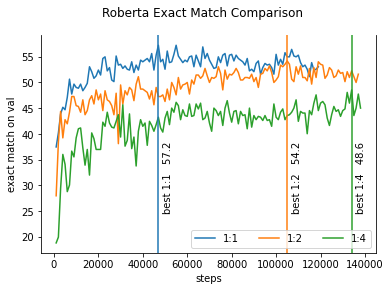

In [ ]:
nextplot()
fig, ax1 = plt.subplots()
plt.plot(result['1to1']['steps'], result['1to1']['exact_match'], label='1:1')
plt.plot(result['1to2']['steps'], result['1to2']['exact_match'], label='1:2')
plt.plot(result['1to4']['steps'], result['1to4']['exact_match'], label='1:4')
plt.legend(ncol=3)
line_best(result['1to1']['steps'], result['1to1']['exact_match'], 'best 1:1', 'tab:blue')
line_best(result['1to2']['steps'], result['1to2']['exact_match'], 'best 1:2', 'tab:orange')
line_best(result['1to4']['steps'], result['1to4']['exact_match'], 'best 1:4', 'tab:green')
ax1.spines['top'].set_visible(False)
ax1.set_ylabel('exact match on val')
plt.xlabel("steps")
plt.suptitle("Roberta Exact Match Comparison")

Text(0.5, 0.98, 'Train Loss Comparison')

<Figure size 432x288 with 0 Axes>

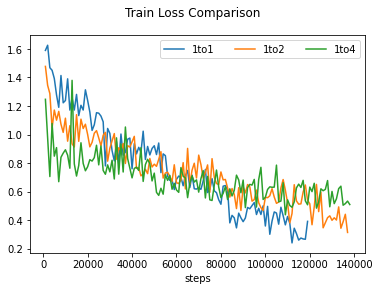

In [ ]:
nextplot()
fig, ax1 = plt.subplots()
plt.plot(result['1to1']['steps'], result['1to1']['train_loss'], label='1to1')
plt.plot(result['1to2']['steps'], result['1to2']['train_loss'], label='1to2')
plt.plot(result['1to4']['steps'], result['1to4']['train_loss'], label='1to4')
plt.legend(ncol=3)
plt.xlabel("steps")
plt.suptitle("Train Loss Comparison")

###### Comparison of Bert, Roberta, Distilbert and DistilRoberta on the balanced set.

Text(0.5, 0.98, 'EM and F1 for Roberta, Distilroberta, Bert and Distilbert')

<Figure size 432x288 with 0 Axes>

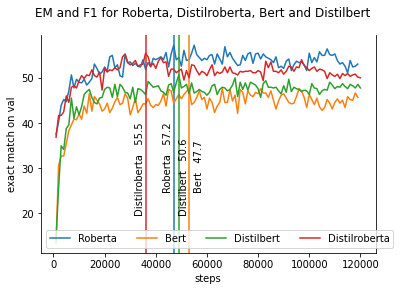

In [ ]:
nextplot()
fig, ax1 = plt.subplots()

plt.plot(result['1to1']['steps'], result['1to1']['exact_match'], label='Roberta', color='tab:blue')
line_best(result['1to1']['steps'], result['1to1']['exact_match'], label='Roberta', color='tab:blue', offsetx = -4000)

plt.plot(compare_1to1_results['bert']['steps'],compare_1to1_results['bert']['exact_match'], label='Bert', color='tab:orange')
line_best(compare_1to1_results['bert']['steps'],compare_1to1_results['bert']['exact_match'], label='Bert', color='tab:orange')

plt.plot(compare_1to1_results['distilbert']['steps'],compare_1to1_results['distilbert']['exact_match'], label='Distilbert', color='tab:green')
line_best(compare_1to1_results['distilbert']['steps'],compare_1to1_results['distilbert']['exact_match'], label='Distilbert', color='tab:green', offsetx = 0, offsety = 20)

plt.plot(compare_1to1_results['distilroberta']['steps'],compare_1to1_results['distilroberta']['exact_match'], label='Distilroberta', color='tab:red')
line_best(compare_1to1_results['distilroberta']['steps'],compare_1to1_results['distilroberta']['exact_match'], label='Distilroberta', color='tab:red', offsety = 20, offsetx = -4000)

ax1.spines['top'].set_visible(False)
ax1.set_ylabel('exact match on val')
plt.legend(ncol=8)
plt.xlabel("steps")
plt.suptitle("EM and F1 for Roberta, Distilroberta, Bert and Distilbert")

###### Plots of training loss against evaluation performance (EM and F1 score) for all models:

<Figure size 432x288 with 0 Axes>

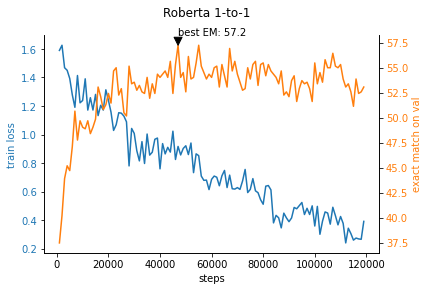

In [ ]:
# Roberta balanced
plot_train_against_val(result['1to1'], 'Roberta 1-to-1')

<Figure size 432x288 with 0 Axes>

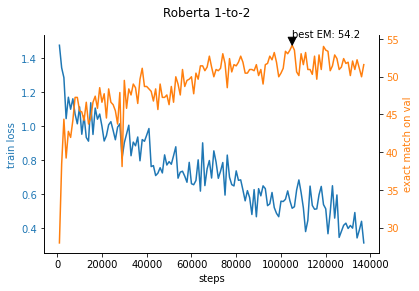

In [ ]:
# Roberta 1:2
plot_train_against_val(result['1to2'], 'Roberta 1-to-2')

<Figure size 432x288 with 0 Axes>

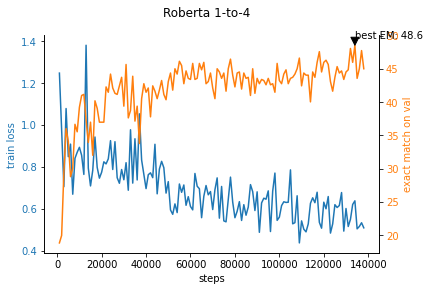

In [ ]:
# Roberta 1:4
plot_train_against_val(result['1to4'], 'Roberta 1-to-4')

52.090032
81


<Figure size 432x288 with 0 Axes>

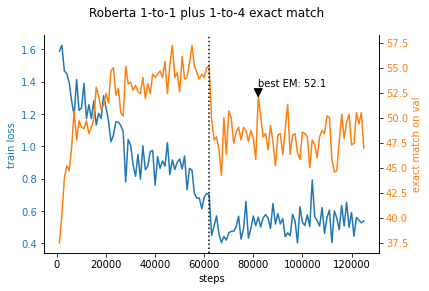

In [ ]:
# Roberta 1-to-1 plus 1-to-4 exact match

nextplot()
    
x = result['1to1+1to4']['steps']
y=result['1to1+1to4']['exact_match']
fig, ax1 = plt.subplots()
#fig.set_size_inches(18.5, 12.5)
color = 'tab:blue'
ax1.set_xlabel('steps')
ax1.set_ylabel('train loss', color=color)
ax1.plot(x, result['1to1+1to4']['train_loss'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
ax2.set_ylabel('exact match on val', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y , color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.axvline(62000, color = 'black', linestyle='dotted')

ymax = max(y[62:])
xpos = y[62:].index(ymax) + 62
xmax = x[xpos]

print(ymax)
print(xpos)

ax2.annotate('best EM' + ': %.1f' % ymax, xy=(xmax, ymax), xytext=(xmax, ymax + 1),
            arrowprops=dict(facecolor='black', width = 2, headwidth = 8, headlength = 8),
           )
plt.suptitle('Roberta 1-to-1 plus 1-to-4 exact match')
plt.show()

56.201793
81


<Figure size 432x288 with 0 Axes>

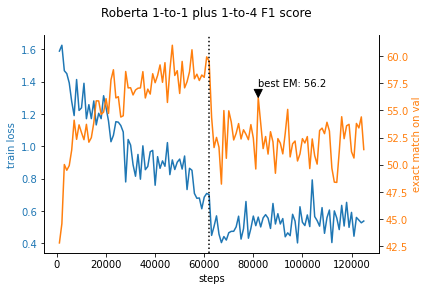

In [ ]:
# Roberta 1-to-1 plus 1-to-4 F1 score

nextplot()
    
x = result['1to1+1to4']['steps']
y=result['1to1+1to4']['F1']
fig, ax1 = plt.subplots()
#fig.set_size_inches(18.5, 12.5)
color = 'tab:blue'
ax1.set_xlabel('steps')
ax1.set_ylabel('train loss', color=color)
ax1.plot(x, result['1to1+1to4']['train_loss'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
ax2.set_ylabel('exact match on val', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y , color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.axvline(62000, color = 'black', linestyle='dotted')

ymax = max(y[62:])
xpos = y[62:].index(ymax) + 62
xmax = x[xpos]

print(ymax)
print(xpos)

ax2.annotate('best EM' + ': %.1f' % ymax, xy=(xmax, ymax), xytext=(xmax, ymax + 1),
            arrowprops=dict(facecolor='black', width = 2, headwidth = 8, headlength = 8),
           )

plt.suptitle('Roberta 1-to-1 plus 1-to-4 F1 score')
plt.show()

<Figure size 432x288 with 0 Axes>

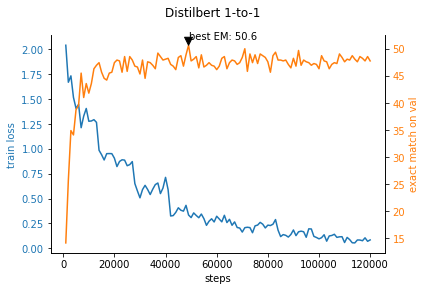

In [ ]:
# Distilbert balanced 
plot_train_against_val(compare_1to1_results['distilbert'], 'Distilbert 1-to-1')

<Figure size 432x288 with 0 Axes>

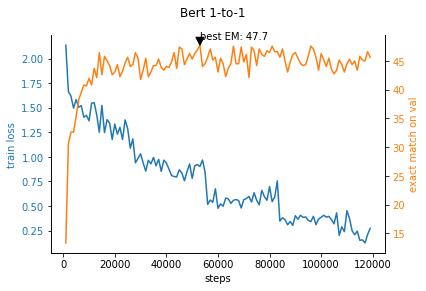

In [ ]:
# Bert balanced
plot_train_against_val(compare_1to1_results['bert'], 'Bert 1-to-1')

<Figure size 432x288 with 0 Axes>

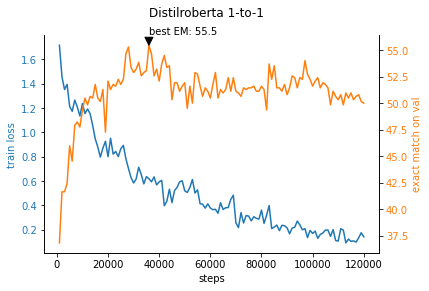

In [ ]:
# Distilroberta balanced
plot_train_against_val(compare_1to1_results['distilroberta'], 'Distilroberta 1-to-1')

###### Comparison of exact match and F1 score of the Roberta model trained on differently balanced sets:

Text(0.5, 0.98, 'EM and F1 Comparison')

<Figure size 432x288 with 0 Axes>

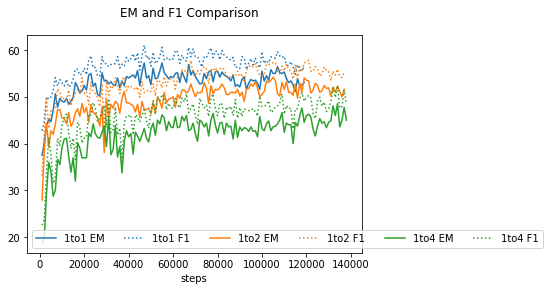

In [ ]:
nextplot()
fig, ax1 = plt.subplots()

plt.plot(result['1to1']['steps'], result['1to1']['exact_match'], label='1to1 EM', color='tab:blue')
plt.plot(result['1to1']['steps'], result['1to1']['F1'], label='1to1 F1', color='tab:blue', linestyle='dotted')

plt.plot(result['1to2']['steps'], result['1to2']['exact_match'], label='1to2 EM', color='tab:orange')
plt.plot(result['1to2']['steps'], result['1to2']['F1'], label='1to2 F1', color='tab:orange', linestyle='dotted')

plt.plot(result['1to4']['steps'], result['1to4']['exact_match'], label='1to4 EM', color='tab:green')
plt.plot(result['1to4']['steps'], result['1to4']['F1'], label='1to4 F1', color='tab:green', linestyle='dotted')

plt.legend(ncol=6)
plt.xlabel("steps")
plt.suptitle("EM and F1 Comparison")

Text(0.5, 0.98, 'F1 Comparison for differently balanced datasets')

<Figure size 432x288 with 0 Axes>

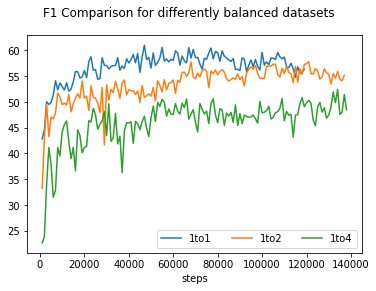

In [ ]:
nextplot()
fig, ax1 = plt.subplots()
plt.plot(result['1to1']['steps'], result['1to1']['F1'], label='1to1')
plt.plot(result['1to2']['steps'], result['1to2']['F1'], label='1to2')
plt.plot(result['1to4']['steps'], result['1to4']['F1'], label='1to4')
plt.legend(ncol=3)
plt.xlabel("steps")
plt.suptitle("F1 Comparison for differently balanced datasets")